In [29]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_digits, load_breast_cancer, fetch_olivetti_faces
from sklearn.model_selection import StratifiedKFold, cross_val_score, LeaveOneOut, train_test_split
from sklearn.metrics import pairwise_distances, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Implementación del algoritmo KNN
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y) 
        return self

    def predict(self, X):
        distances = pairwise_distances(X, self.X_train)
        neighbors_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        neighbors_labels = self.y_train[neighbors_indices]
        return np.array([np.argmax(np.bincount(labels.astype(int))) for labels in neighbors_labels])

    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [31]:
def evaluate_knn(dataset, k):
    X, y = dataset.data, dataset.target
    
    # Normalizar los datos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    knn = KNN(n_neighbors=k)
    
    # Hold-Out 70/30 estratificado
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hold-Out 70/30 - Precisión: {accuracy}")
    
    
    # Fold Cross-Validation estratificado
    skf = StratifiedKFold(n_splits=10)
    accuracies = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
    print(f"10-Fold Cross-Validation - Precisión media: {np.mean(accuracies)}")
    
    # Leave-One-Out
    loo = LeaveOneOut()
    loo_accuracies = cross_val_score(knn, X, y, cv=loo, scoring='accuracy')
    print(f"Leave-One-Out - Precisión media: {np.mean(loo_accuracies)}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión')
    plt.show()


Evaluando el dataset: .. _digits_dataset:
Hold-Out 70/30 - Precisión: 0.9722222222222222
10-Fold Cross-Validation - Precisión media: 0.9566045934202358
Leave-One-Out - Precisión media: 0.9782971619365609


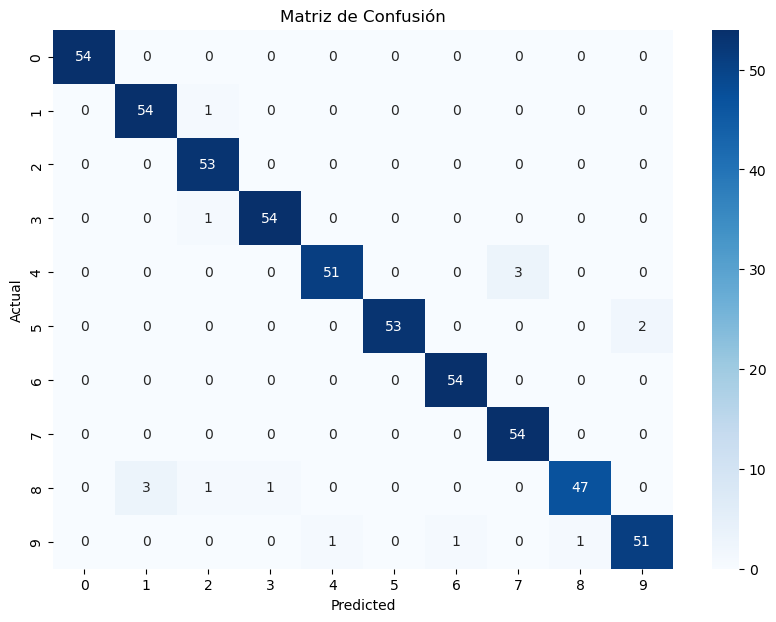

Evaluando el dataset: .. _breast_cancer_dataset:
Hold-Out 70/30 - Precisión: 0.9532163742690059
10-Fold Cross-Validation - Precisión media: 0.9647869674185465
Leave-One-Out - Precisión media: 0.9648506151142355


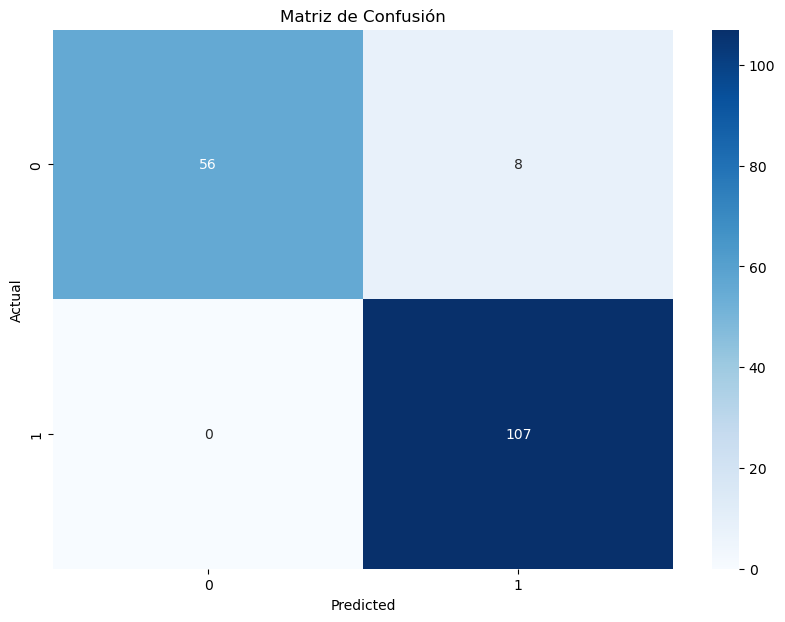

Evaluando el dataset: .. _olivetti_faces_dataset:
Hold-Out 70/30 - Precisión: 0.8583333333333333
10-Fold Cross-Validation - Precisión media: 0.9
Leave-One-Out - Precisión media: 0.895


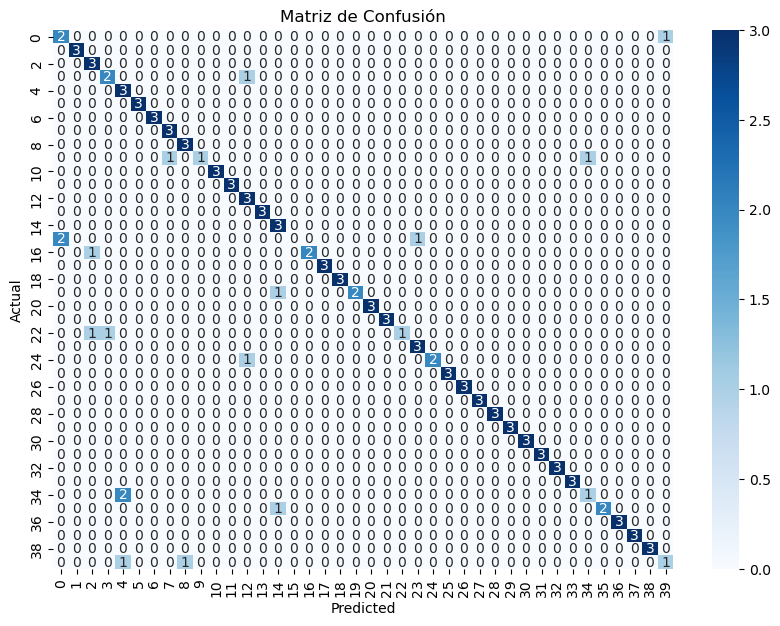

In [32]:
# Evaluar el modelo KNN en tres datasets diferentes
datasets = [load_digits(), load_breast_cancer(), fetch_olivetti_faces()]
for dataset in datasets:
    print(f"Evaluando el dataset: {dataset.DESCR.splitlines()[0]}")
    evaluate_knn(dataset, k=3)